# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from google.transit import gtfs_realtime_pb2
import pprint
pp = pprint.PrettyPrinter()
import time
from datetime import datetime

# import data

In [2]:
# retrive gtfs realtime data from AC transit API and store as MessageFeed object

gtfs_rt_feed = gtfs_realtime_pb2.FeedMessage()
response = requests.get("https://api.actransit.org/transit/gtfsrt/tripupdates/?token=6007969EA35FBAAEF9C3FAF1D65976ED")
gtfs_rt_feed.ParseFromString(response.content)

227612

In [3]:
'''
convert trip_update data in MessageFeed object to pandas DataFrame
'''

# empty dict to store gtfs data. will be translated DataFrame later
tu_dict = {"trip_id":[], "start_time":[], "start_date":[], "route_id":[],
             "dep_delay":[], "dep_time":[], "stop_id":[],
             "veh_id":[], "veh_label":[], "veh_license_plate":[], "timestamp":[]}

for en in gtfs_rt_feed.entity:
    for stu in en.trip_update.stop_time_update:
        tu_dict["trip_id"].append(en.trip_update.trip.trip_id)
        tu_dict["start_time"].append(en.trip_update.trip.start_time)
        tu_dict["start_date"].append(en.trip_update.trip.start_date)
        tu_dict["route_id"].append(en.trip_update.trip.route_id)
        tu_dict['dep_delay'].append(stu.departure.delay)
        tu_dict['dep_time'].append(datetime.fromtimestamp(stu.departure.time))
        tu_dict['stop_id'].append(stu.stop_id)
        tu_dict["veh_id"].append(en.trip_update.vehicle.id)
        tu_dict["veh_label"].append(en.trip_update.vehicle.label)
        tu_dict["veh_license_plate"].append(en.trip_update.vehicle.license_plate)
        tu_dict["timestamp"].append(datetime.fromtimestamp(en.trip_update.timestamp))

tu_df = pd.DataFrame(tu_dict).sort_values(by='dep_time', ascending=False)

tu_df

,trip_id,start_time,start_date,route_id,dep_delay,dep_time,stop_id,veh_id,veh_label,veh_license_plate,timestamp
2864,6278998,22:02:00,20181103,28,0,2018-11-03 23:02:00,0802040,1364,,,2018-11-03 22:07:47
2862,6278998,22:02:00,20181103,28,0,2018-11-03 23:01:00,0800570,1364,,,2018-11-03 22:07:47
2863,6278998,22:02:00,20181103,28,0,2018-11-03 23:01:00,0800580,1364,,,2018-11-03 22:07:47
2861,6278998,22:02:00,20181103,28,0,2018-11-03 23:00:00,0800530,1364,,,2018-11-03 22:07:47
2859,6278998,22:02:00,20181103,28,0,2018-11-03 22:59:00,0800430,1364,,,2018-11-03 22:07:47
2860,6278998,22:02:00,20181103,28,0,2018-11-03 22:59:00,0800420,1364,,,2018-11-03 22:07:47
2857,6278998,22:02:00,20181103,28,0,2018-11-03 22:58:00,0800480,1364,,,2018-11-03 22:07:47
2858,6278998,22:02:00,20181103,28,0,2018-11-03 22:58:00,0800460,1364,,,2018-11-03 22:07:47
951,6167383,22:00:00,20181103,12,0,2018-11-03 22:58:00,9904280,1356,,,2018-11-03 22:07:47
950,6167383,22:00:00,20181103,12,0,2018-11-03 22:57:00,0302710,1356,,,2018-11-03 22:07:47


# extract data

In [4]:
tu_df_52 = tu_df[(tu_df["route_id"] == "52") & (tu_df["stop_id"] == "0200760")]
tu_df_52.head()

,trip_id,start_time,start_date,route_id,dep_delay,dep_time,stop_id,veh_id,veh_label,veh_license_plate,timestamp


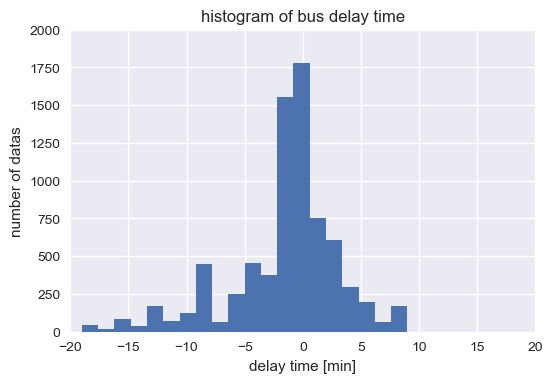

In [46]:
import seaborn as sns
sns.set()
plt.figure(dpi=100)
plt.hist(tu_df["dep_delay"]/60, bins=20)
plt.xlim(-20,20)
plt.ylim(0,2000)
plt.xlabel("delay time [min]")
plt.ylabel("number of datas")
plt.title("histogram of bus delay time")
plt.savefig("histogram_of_delay_time")
plt.show()

## import data

In [6]:
!pip install TwitterAPI

In [7]:
from TwitterAPI import TwitterAPI
import pprint
pp = pprint.PrettyPrinter()
import keys

In [8]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(keys.consumer_key, keys.consumer_secret, 
                 keys.access_token, keys.access_token_secret)

In [9]:
# search for public tweets geotagged near the UC Berkeley campus

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'sammy_suyama', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @ysk_tnk_1004: @sammy_suyama ちょうどその時期に学位論文を取りましたが、想定の説明変数やデータ外からの突発的変異の予想は無理と明記して、ベイズ型モデルの提案ですが東大の審査通りました。
なんでも学習できるという風潮は困るしリテラシーが必要ですね。


In [10]:
pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Nov 02 12:46:24 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 258327769,
                                 'id_str': '258327769',
                                 'indices': [3, 16],
                                 'name': 'ysktnk',
                                 'screen_name': 'ysk_tnk_1004'},
                                {'id': 4659778392,
                                 'id_str': '4659778392',
                                 'indices': [18, 31],
                                 'name': 'Sammy Suyama',
                                 'screen_name': 'sammy_suyama'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1058339540316782592,
 'id_str': '1058339540316782592',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_repl

In [11]:
pp.pprint(tweet["user"]["screen_name"])

'sammy_suyama'


In [12]:
endpoint = 'search/tweets'
params = {
    'q': '*',
    "lang": "ja",
    'geocode': '37.884453,-122.302357,5km', 
    'count': 100
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet["created_at"] + "@" + tweet["user"]["screen_name"] + " " + tweet['text'] + '\n')

Sun Nov 04 05:07:07 +0000 2018@FloofHazrd RT @Arkie_of_Bemani: #G2R2018
Arctures - Preta
Team Keysounds

https://t.co/zaaHYxSfkH

作曲, BMS, BGA: Arctures
イラスト: Muy Mapache (@TeekayRa…

Sun Nov 04 04:35:11 +0000 2018@kazu_y RT @IDA_10: 金曜の朝、日本から届いた『日英語表現辞典』を郵便局で受け取って向かいの汚いカフェでパラパラと。最初の数ページでそう！それ！の連続。何か困ったこと、ムカつくこと、何でもいいんだけど相談しても最初に聞かれるのってAlternative はないの？なんだよね。…

Sun Nov 04 04:23:25 +0000 2018@Arkie_of_Bemani @NitroX72 I know how much people hate ソフラン so I attempted to compromise. It's tough to get a nice even number when… https://t.co/dlPyBmRwwt

Sun Nov 04 04:17:37 +0000 2018@honokurosan @asamiso14063 ネイビーのだぼってしたパーカーにベージュのワイドパンツ……小学生男子……寝癖……すっぴんマスク……

Sun Nov 04 04:11:40 +0000 2018@honokurosan プロ奢のマネージャー東大生なのか

Sun Nov 04 04:09:45 +0000 2018@honokurosan ｽﾞﾝ…… https://t.co/nXz4H2Cvhg

Sun Nov 04 04:08:54 +0000 2018@honokurosan 今日部屋着そのまま出てきたみたいな格好してきたから無理すぎる……気配を消したい

Sun Nov 04 04:04:05 +0000 2018@honokurosan クソ陰キャ宅浪生は駿台生が怖い

Sun Nov 04 03:43:25 +0000 2018@IDA_10 @asa10megumi 感想まで当時（200